In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import plotly.express as px
from sklearn import neighbors, tree, metrics

In [3]:
df_path = 'dataset (2).csv'
df = pd.read_csv(df_path)

df

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,label
0,-1.213834,-49.973587,28.744257,0,-0.601593,1,0.313393,-8.230219,-26.671694,-1.131748,0.117770,-0.389731,0,-0.495928,1.415132,0
1,0.520963,-4.793443,27.565379,1,1.863782,0,-0.221920,0.459143,-24.498990,0.217191,0.349115,-1.022428,0,0.182464,-0.261593,0
2,1.615967,-134.932563,29.318697,0,-2.286942,1,-1.938862,1.146823,-24.750201,-2.641071,-0.028287,1.649905,0,-0.049554,1.141356,2
3,0.515353,-28.830914,27.131040,0,1.415902,0,0.449491,2.629880,-23.607768,-0.339882,1.426010,0.525958,0,0.594348,-1.471240,1
4,0.955686,18.626242,28.629634,1,0.244995,0,-0.382944,-0.521622,-24.991556,0.202819,0.329095,1.153936,0,1.134885,-0.890348,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-0.769823,4.141195,31.337187,0,-0.523496,0,-1.309897,2.618357,-28.465039,-0.363209,0.712666,-1.072315,1,-1.925080,1.949458,0
297,1.545867,-209.165484,28.984338,0,-0.454577,1,-0.775706,0.529567,-24.657680,-3.526238,0.327065,-0.259888,1,0.829395,-0.413161,2
298,2.214075,-171.119431,29.649254,1,-1.913201,1,-0.436468,4.277478,-23.142021,-2.266296,1.078961,0.244132,0,-1.857672,0.409611,2
299,-0.714279,13.113728,29.459637,0,-0.881224,0,-0.763188,-1.604556,-24.307004,2.455511,-0.474795,-2.099100,0,0.433823,-2.753886,1


Apply decision tree classification using scikit-learn to the dataset below. Use min_samples_leaf=5 in the decision tree to regularize the tree -- i.e., to prevent it from learning to classify instances into leaves with fewer than 5 instances in them.

The dataset has a binary label column that you will predict using the rest of the columns.

Train your model on the first 200 rows of the dataset. Test it on the remaining rows. You might find it helpful to use the iloc property of Pandas to split the data into training and testing sets.

Read in the data from the current directory, i.e., pd.read_csv('dataset.csv'), since this is where the data will be on the autograder machine.

Dataset: download here

Your code should define the following variables:

Name	Type	Description
train_df	Pandas DataFrame	Training data
test_df	Pandas DataFrame	Testing data
predictions	Numpy array	Numpy array of predictions
acc	Number	Cohen's kappa between predictions and ground truth

## Use ScikitLearn

In [8]:
test = df.columns[df.columns != 'label']
df[test]

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,-1.213834,-49.973587,28.744257,0,-0.601593,1,0.313393,-8.230219,-26.671694,-1.131748,0.117770,-0.389731,0,-0.495928,1.415132
1,0.520963,-4.793443,27.565379,1,1.863782,0,-0.221920,0.459143,-24.498990,0.217191,0.349115,-1.022428,0,0.182464,-0.261593
2,1.615967,-134.932563,29.318697,0,-2.286942,1,-1.938862,1.146823,-24.750201,-2.641071,-0.028287,1.649905,0,-0.049554,1.141356
3,0.515353,-28.830914,27.131040,0,1.415902,0,0.449491,2.629880,-23.607768,-0.339882,1.426010,0.525958,0,0.594348,-1.471240
4,0.955686,18.626242,28.629634,1,0.244995,0,-0.382944,-0.521622,-24.991556,0.202819,0.329095,1.153936,0,1.134885,-0.890348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-0.769823,4.141195,31.337187,0,-0.523496,0,-1.309897,2.618357,-28.465039,-0.363209,0.712666,-1.072315,1,-1.925080,1.949458
297,1.545867,-209.165484,28.984338,0,-0.454577,1,-0.775706,0.529567,-24.657680,-3.526238,0.327065,-0.259888,1,0.829395,-0.413161
298,2.214075,-171.119431,29.649254,1,-1.913201,1,-0.436468,4.277478,-23.142021,-2.266296,1.078961,0.244132,0,-1.857672,0.409611
299,-0.714279,13.113728,29.459637,0,-0.881224,0,-0.763188,-1.604556,-24.307004,2.455511,-0.474795,-2.099100,0,0.433823,-2.753886


score:  0.31579705967137495  | ( min leaf =  5 ).


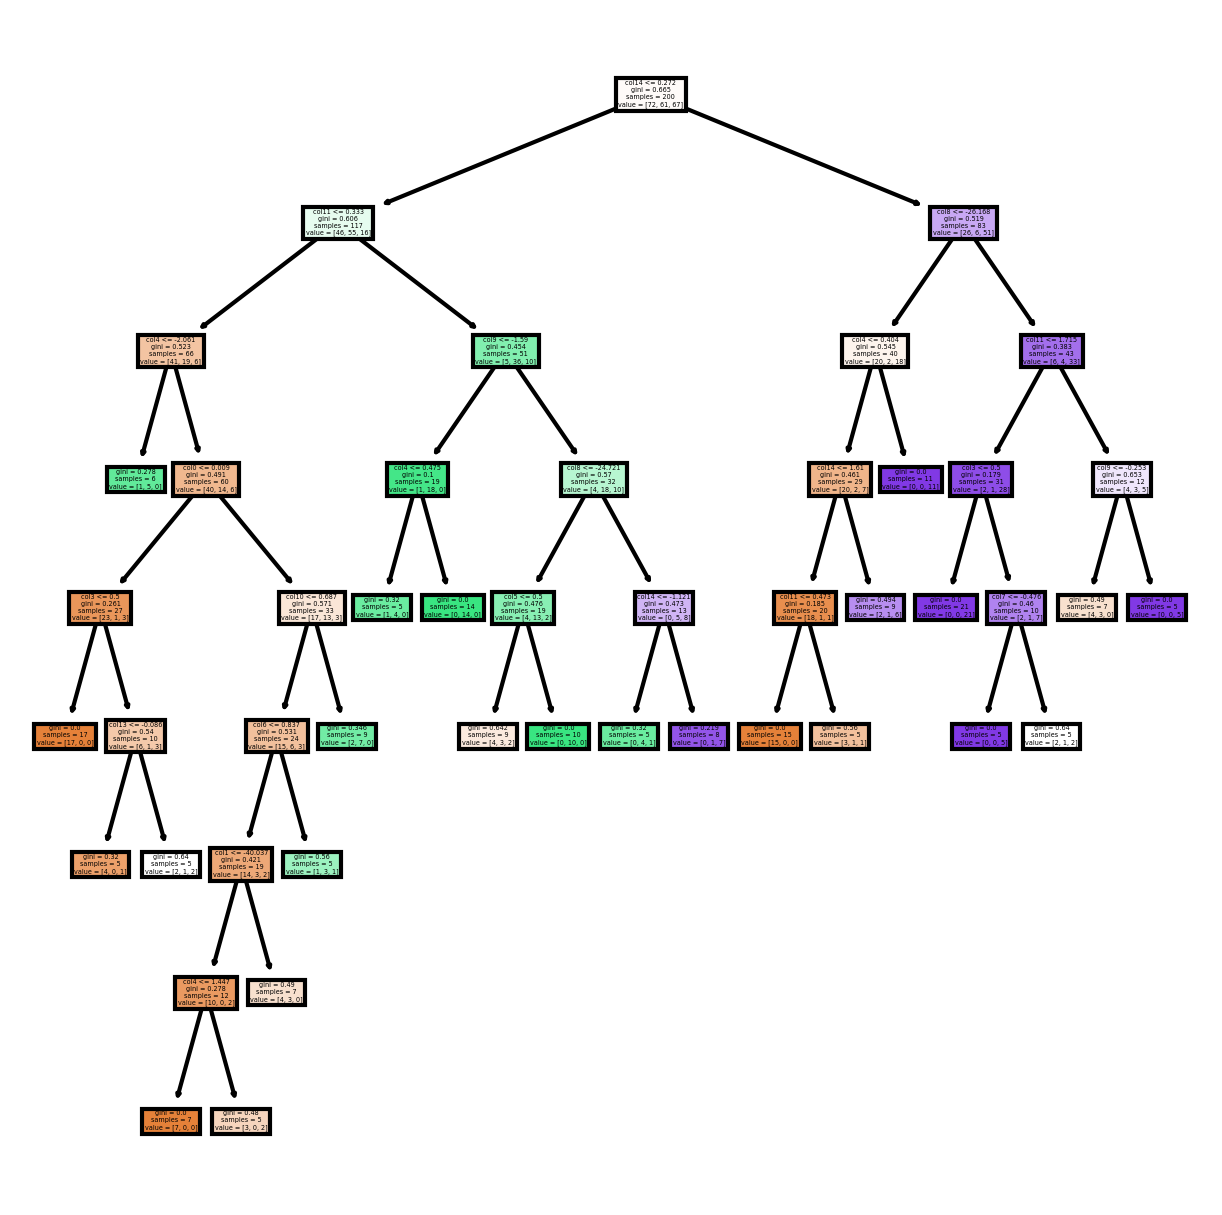

In [11]:
train_test_split_loc = 200

train_df = df.iloc[:train_test_split_loc]
test_df = df.iloc[train_test_split_loc:]

min_leaf = 5

model = tree.DecisionTreeClassifier(min_samples_leaf=min_leaf)
features = df.columns[df.columns != 'label']
label = ['label']

train_X = train_df[features]
train_y = train_df[label]
test_X = test_df[features]
test_y = test_df[label]

model.fit(train_X, train_y)

predictions = model.predict(test_X)
acc = metrics.cohen_kappa_score(predictions, test_y)

print('score: ', acc, ' | ( min leaf = ', min_leaf, ').')

plt.figure(dpi=300, figsize=(5, 5))
_ = tree.plot_tree(model, feature_names=features, filled=True)
